In [1]:
from random import randint
import numpy as np
X_true = [randint(1, 100) *0.01 for i in range(2000)]

In [2]:
#Features SLOPE / INTERCEPT
#AGE
TARGET_SLOPE = 2.0
#PCÖASS
TARGET_INTERCEPT = -1.5
NOISE = 0.2
#For every value in x
#Datapoint x
#Label y


y_true = [TARGET_SLOPE * val + TARGET_INTERCEPT + np.random.normal(-NOISE, NOISE) for val in X_true]

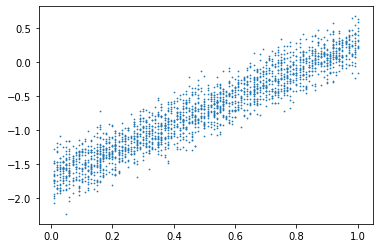

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

rands= range(1,100)
plt.scatter(X_true, y_true, s = 0.5)
None

#### Make a Line

In [4]:
# for x in Xtrue:
#    slope * x + intercept -> LIST

def make_Line(X, slope, intercept):

    return[slope * x + intercept for x in X_true]

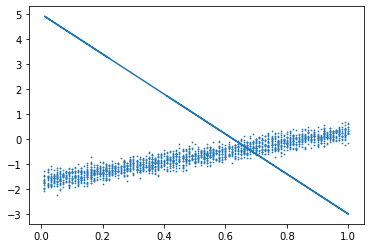

In [5]:
#2.0 , -1.7 -> values to go
make_Line(X_true, -8.0, 5.0)
y_pred_bad = make_Line(X_true, -8.0, 5.0)
plt.scatter(X_true, y_true, s=0.5)
plt.plot(X_true, y_pred_bad)
None

make_Line(Xtrue, -8.0, 5.0)

In [6]:
vals = []
for yt, yp in list(zip(y_true, y_pred_bad)):
    vals.append((yt - yp)**2)

sum(vals) / len(y_true)

11.283153866664627

In [7]:
sum([(yt - yp)**2 for yt, yp in list(zip(y_true, y_pred_bad))]) / len(y_true)

11.283153866664627

#### Calculate the Loss (e.g MSE)

In [8]:
def mse(y_true, y_pred_bad):
    return sum([(yt - yp)**2
                for yt, yp in list(zip(y_true, y_pred_bad))]) / len(y_true)

In [9]:
y_pred_bad = make_Line(X_true, 8.0, 5.0)
mse(y_true, y_pred_bad)

96.30579000653661

#### Calculate the Gradient
#####  In wich direction should we twek our pararmeters?

In [10]:
slope = 8.0
intercept = 3.0

dw = 0.001

# Lets play around with just our fiest parameter
y_pred = make_Line(X_true, slope, intercept)

slope_change = slope + dw

y_pred_slope = make_Line(X_true, slope_change, intercept)  #ONLY TWEAK SLOPE
grad_slope = (mse(y_true, y_pred_slope) - mse(y_true, y_pred)) / dw

intercept_change = intercept + dw
y_pred_intercept = make_Line(X_true, slope, intercept_change)
grad_intercept = (mse(y_true, y_pred_intercept) - mse(y_true, y_pred)) / dw
print(
    f'Slope Grandient: {grad_slope:.2f}, Intercept Grandient: {grad_intercept:.2f}'
)

Slope Grandient: 8.53, Intercept Grandient: 15.32


In [11]:
#Calc Line
#Calc Loss


def get_gradients(X_true, y_true, slope, intercept, dw=0.001):

    #    slope = 8.0
    #    intercept = 3.0
    #
    #   dw = 0.001

    # Lets play around with just our fiest parameter
    y_pred = make_Line(X_true, slope, intercept)

    slope_change = slope + dw

    y_pred_slope = make_Line(X_true, slope_change, intercept)  #ONLY TWEAK SLOPE
    grad_slope = (mse(y_true, y_pred_slope) - mse(y_true, y_pred)) / dw
    intercept_change = intercept + dw
    y_pred_intercept = make_Line(X_true, slope, intercept_change)
    grad_intercept = (mse(y_true, y_pred_intercept) - mse(y_true, y_pred)) / dw

    return grad_slope, grad_intercept

In [12]:
get_gradients(X_true, y_true, 5.0, 2)

(5.596895219369458, 10.366287299067523)

#### 4. Implement the Gradient Descent Algorithm

In [13]:
LR = 0.05  # tells how far to go (steps)
SLOPE = 8.0
INTERCEPT = 5.0

MAX_ITER = 1200

#ytrue -> Label

for i in range(1, MAX_ITER + 1):

    grad_slope, grad_intercept = get_gradients(X_true, y_true, SLOPE, INTERCEPT)

    SLOPE_NEW = SLOPE + (-LR * grad_slope)
    INTERCEPT_NEW = INTERCEPT + (-LR * grad_intercept)

    SLOPE = SLOPE_NEW
    INTERCEPT = INTERCEPT_NEW

    if i % 10 == 0:
        print(f'Step: {i}, Slope: {SLOPE}, Intercept: {INTERCEPT}')

Step: 10, Slope: 4.869187777299537, Intercept: -0.6492527878080345
Step: 20, Slope: 3.9722645311944174, Intercept: -2.0758991778984814
Step: 30, Slope: 3.661760334693565, Intercept: -2.4065023511488386
Step: 40, Slope: 3.508669682082372, Intercept: -2.45444748288929
Step: 50, Slope: 3.4010605631860926, Intercept: -2.4312244770449976
Step: 60, Slope: 3.3095246795504316, Intercept: -2.391715612968674
Step: 70, Slope: 3.226144691853875, Intercept: -2.3500620333053828
Step: 80, Slope: 3.1486119443668255, Intercept: -2.30981247077584
Step: 90, Slope: 3.076092743623507, Intercept: -2.271767621718719
Step: 100, Slope: 3.0081517618513085, Intercept: -2.236020797603522
Step: 110, Slope: 2.9444709874560258, Intercept: -2.2024884375535443
Step: 120, Slope: 2.8847757396688793, Intercept: -2.1710477016523217
Step: 130, Slope: 2.8288146162285654, Intercept: -2.141571851930053
Step: 140, Slope: 2.7763535249156552, Intercept: -2.113939063334573
Step: 150, Slope: 2.727173426758626, Intercept: -2.088034

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


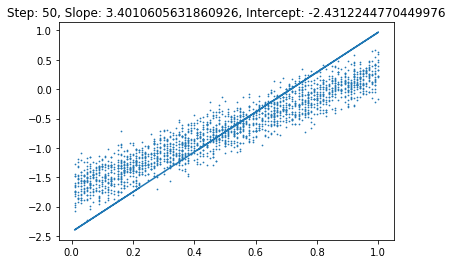

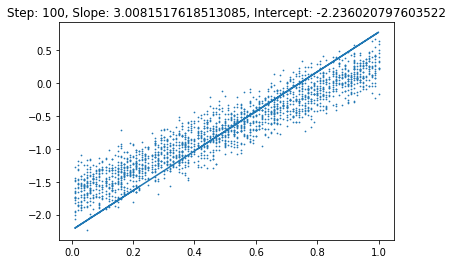

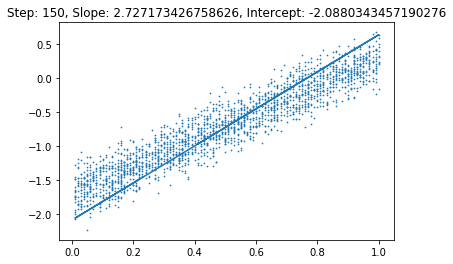

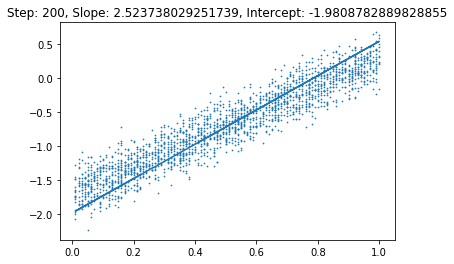

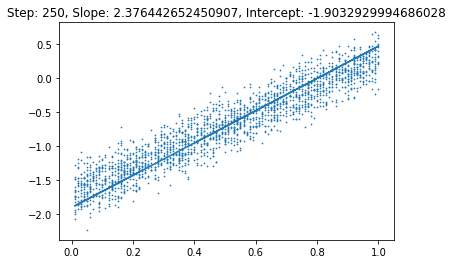

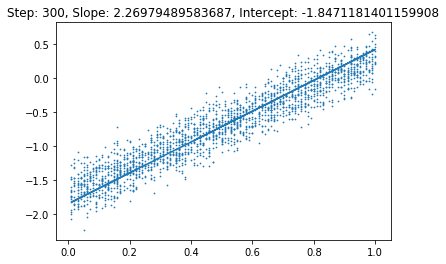

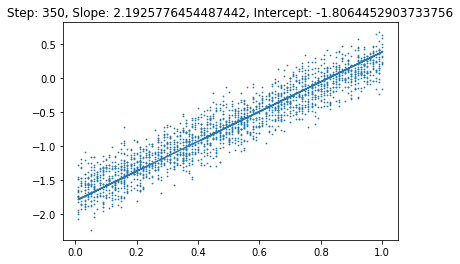

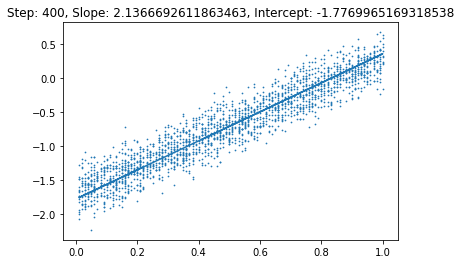

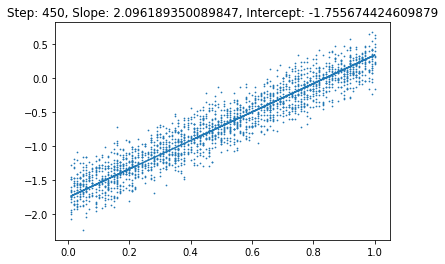

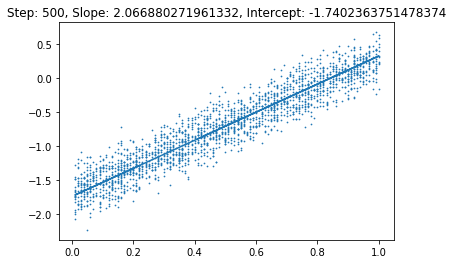

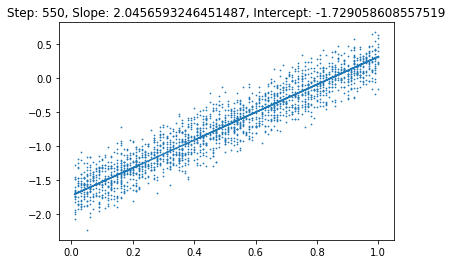

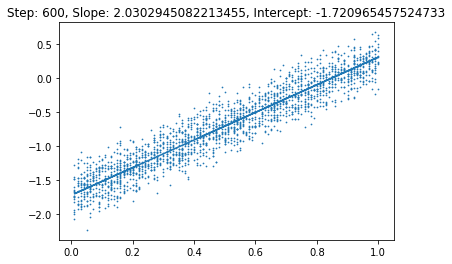

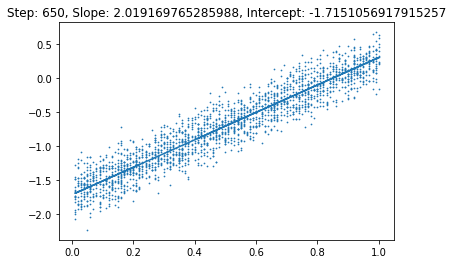

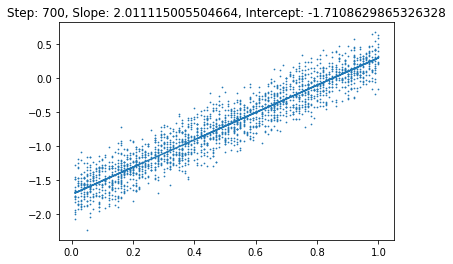

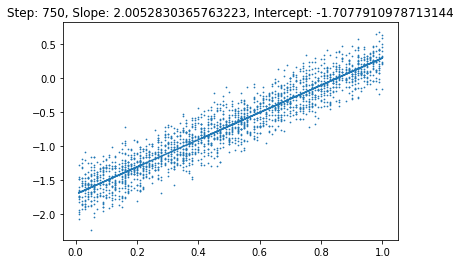

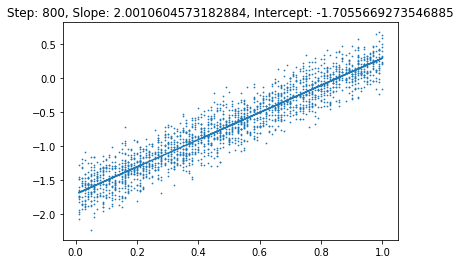

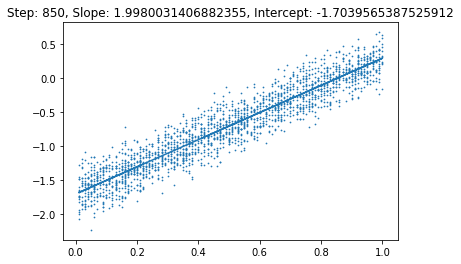

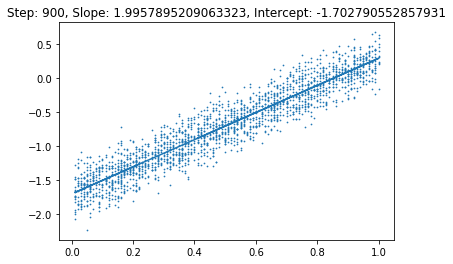

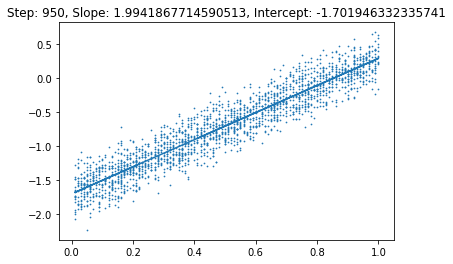

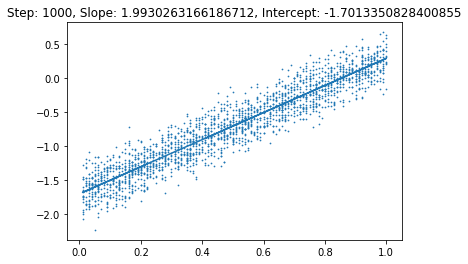

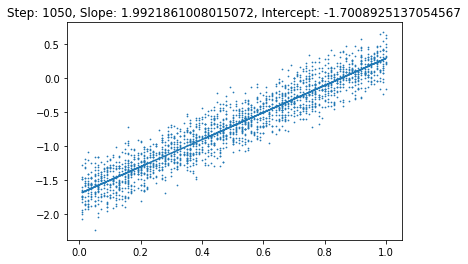

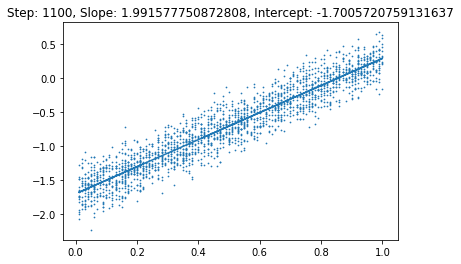

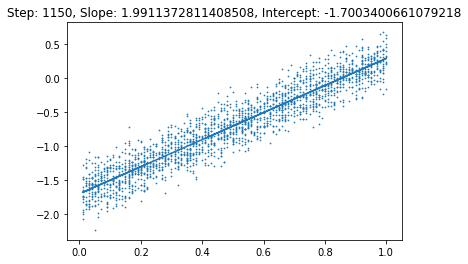

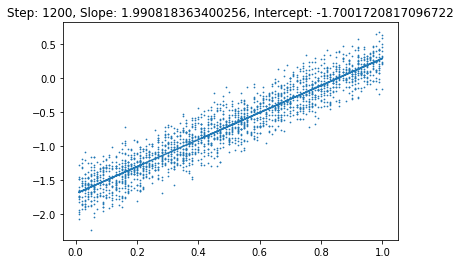

In [14]:
LR = 0.05  # tells how far to go (steps)
SLOPE = 8.0
INTERCEPT = 5.0

MAX_ITER = 1200

#ytrue -> Label

for i in range(1, MAX_ITER + 1):

    grad_slope, grad_intercept = get_gradients(X_true, y_true, SLOPE, INTERCEPT)

    SLOPE_NEW = SLOPE + (-LR * grad_slope)
    INTERCEPT_NEW = INTERCEPT + (-LR * grad_intercept)

    SLOPE = SLOPE_NEW
    INTERCEPT = INTERCEPT_NEW

    if i % 50 == 0:

        y_pred_bad = make_Line(X_true, SLOPE, INTERCEPT)
        plt.figure()
        plt.scatter(X_true, y_true, s=0.5)
        plt.plot(X_true, y_pred_bad)
        plt.title(f'Step: {i}, Slope: {SLOPE}, Intercept: {INTERCEPT}')
        plt.plot()

#### Step: 1200, Slope: 2.0 Intercept: -1.7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


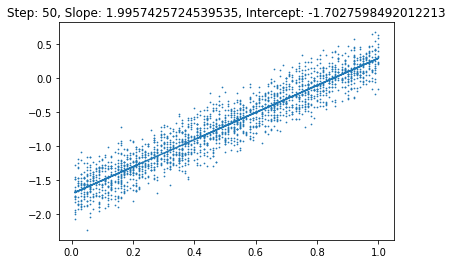

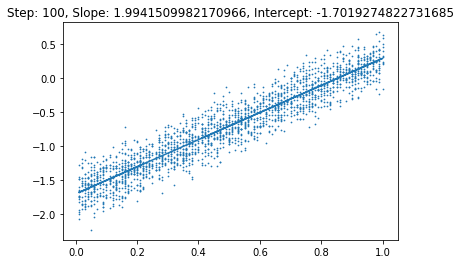

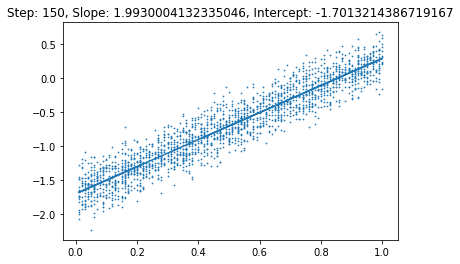

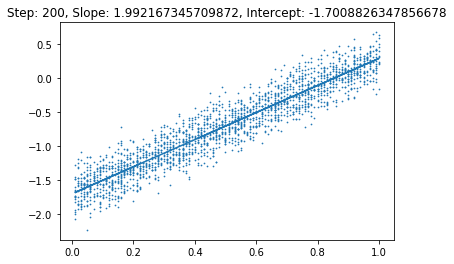

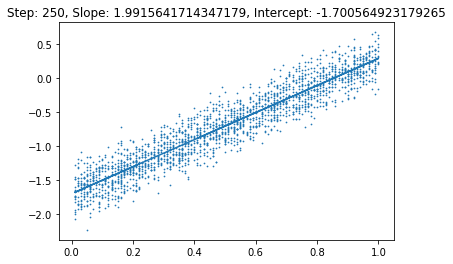

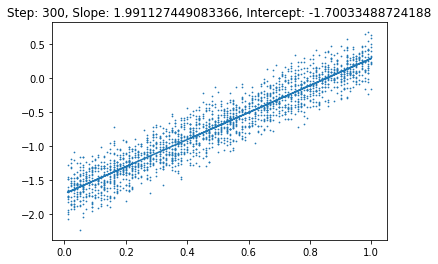

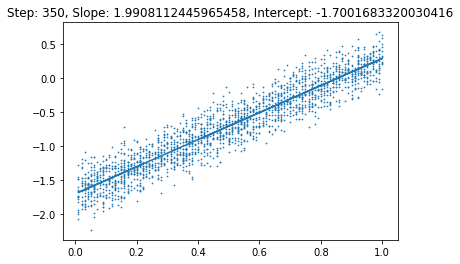

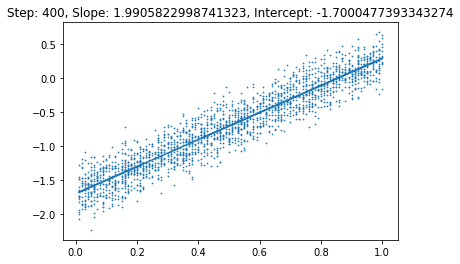

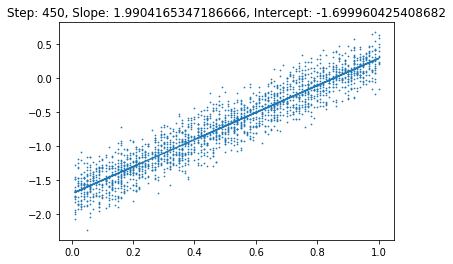

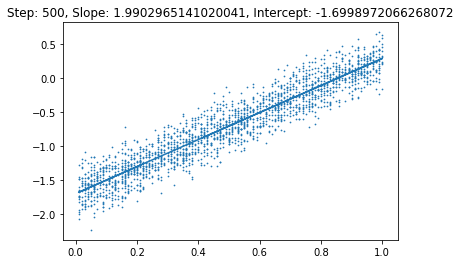

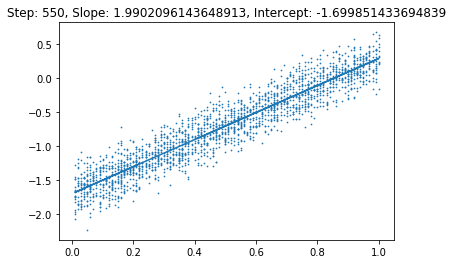

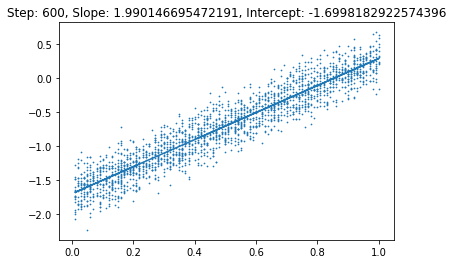

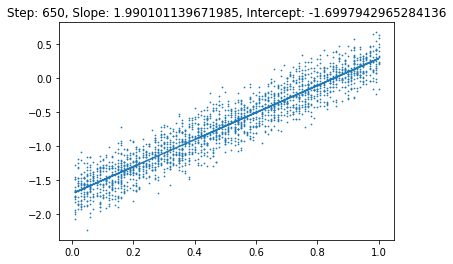

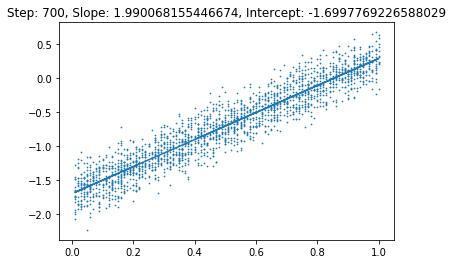

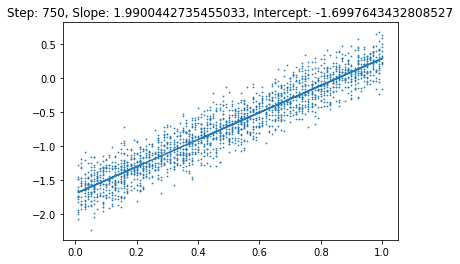

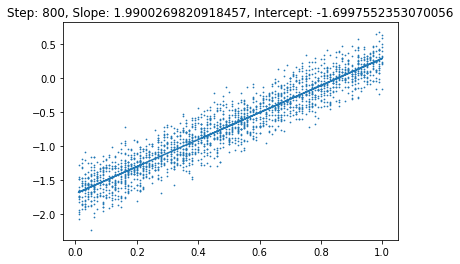

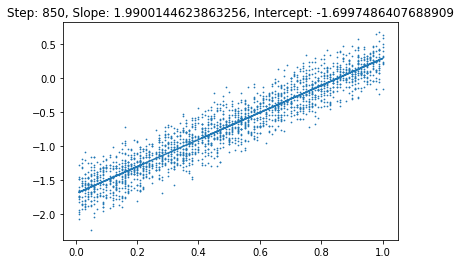

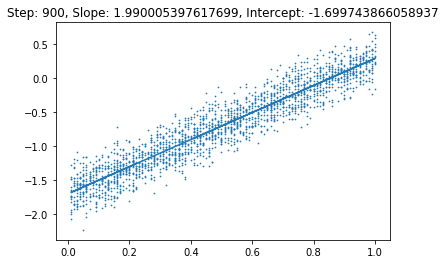

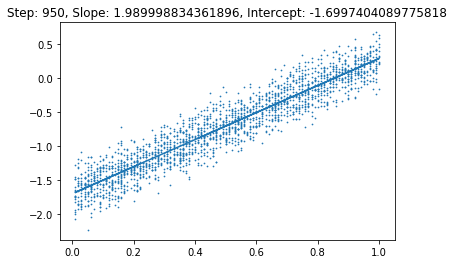

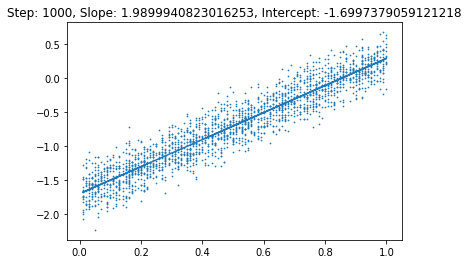

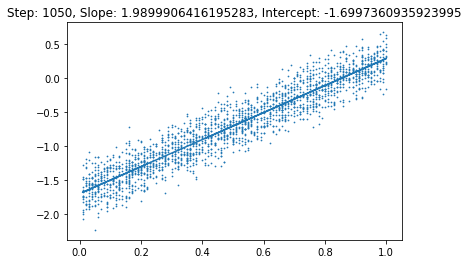

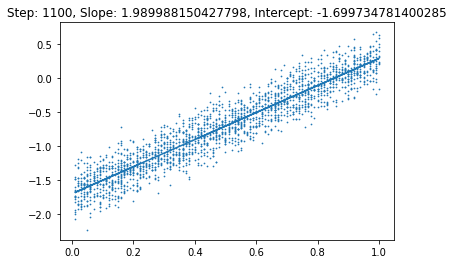

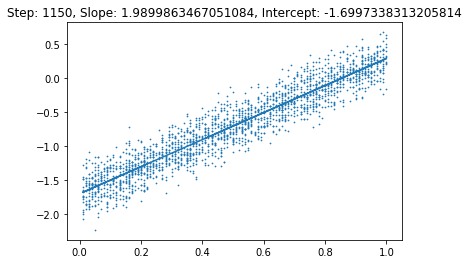

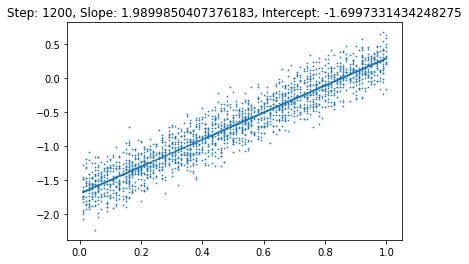

In [15]:
LR = 0.05  # tells how far to go (steps)
SLOPE = 2.0
INTERCEPT = -1.7

MAX_ITER = 1200

#ytrue -> Label

for i in range(1, MAX_ITER + 1):

    grad_slope, grad_intercept = get_gradients(X_true, y_true, SLOPE, INTERCEPT)

    SLOPE_NEW = SLOPE + (-LR * grad_slope)
    INTERCEPT_NEW = INTERCEPT + (-LR * grad_intercept)

    SLOPE = SLOPE_NEW
    INTERCEPT = INTERCEPT_NEW

    if i % 50 == 0:

        y_pred_bad = make_Line(X_true, SLOPE, INTERCEPT)
        plt.figure()
        plt.scatter(X_true, y_true, s=0.5)
        plt.plot(X_true, y_pred_bad)
        plt.title(f'Step: {i}, Slope: {SLOPE}, Intercept: {INTERCEPT}')
        plt.plot()
        